## *Step-1: Business Problem Understanding*
Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers. 

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [100]:
data=pd.read_csv('LoanData.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## *Step-2:Data Understanding*

**2.1 Understand each and every column**

- Loan_ID: Unique Loan ID- 
Gende: 	Male/ Female- 
Marri: d	Applicant married (Y/N- )
Depende: ts	Number of dependen- ts
Educa: ion	Applicant Education (Graduate/ Under Gradua- te)
Self_Emp: Whether the applicant is oyed	Self employed (- Y/N)
Applicant: ncome	Applicant i- ncome
Coapplican: Income	Coapplicant - income
Lo: nAmount	Loan amount in th- ousands
Loan_Am: unt_Term	Term of loan i- n months
Cred: t_History	credit history meets g- uidelines
Pr: perty_Area	Urban/ Semi Ur- ban/ Rural: Loan_Status	(Target) Loan approved (Y/N)

In [104]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [106]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [108]:
data['Loan_ID'].nunique()

614

**Drop Unimportant columns as per feature selection (filter methods)**

In [111]:
data.drop(columns=['Loan_ID'],inplace=True)

In [113]:
for col in data.describe(include='object').columns:
    print(col)
    print('-'*50)
    print(data[col].value_counts())

Gender
--------------------------------------------------
Gender
Male      489
Female    112
Name: count, dtype: int64
Married
--------------------------------------------------
Married
Yes    398
No     213
Name: count, dtype: int64
Dependents
--------------------------------------------------
Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64
Education
--------------------------------------------------
Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64
Self_Employed
--------------------------------------------------
Self_Employed
No     500
Yes     82
Name: count, dtype: int64
Property_Area
--------------------------------------------------
Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64
Loan_Status
--------------------------------------------------
Loan_Status
Y    422
N    192
Name: count, dtype: int64


**Create new columns as per requirement**

In [116]:
data['Income']=data['ApplicantIncome'] + data['CoapplicantIncome']

data.drop(columns=['ApplicantIncome', 'CoapplicantIncome'],inplace=True)

In [118]:
data['Income'].describe()

count      614.000000
mean      7024.705081
std       6458.663872
min       1442.000000
25%       4166.000000
50%       5416.500000
75%       7521.750000
max      81000.000000
Name: Income, dtype: float64

In [120]:
data['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [122]:
data['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [124]:
data['Credit_History'].unique()

array([ 1.,  0., nan])

In [126]:
data['Credit_History']=data['Credit_History'].replace({1:'good',0:'bad'})

In [128]:
data['Credit_History'].unique()

array(['good', 'bad', nan], dtype=object)

In [130]:
data['Credit_History'].value_counts()

Credit_History
good    475
bad      89
Name: count, dtype: int64

In [132]:
continous=['Income','LoanAmount']

discrete_categorical=['Gender','Married','Education','Self_Employed','Credit_History','Property_Area',
                      'Loan_Status']

discrete_count=['Dependents','Loan_Amount_Term']

**Exploratory Data Analysis**

*For Continous Variables*

In [135]:
data[continous].describe()

,Income,LoanAmount
count,614.000000,592.000000
mean,7024.705081,146.412162
std,6458.663872,85.587325
min,1442.000000,9.000000
25%,4166.000000,100.000000
50%,5416.500000,128.000000
75%,7521.750000,168.000000
max,81000.000000,700.000000


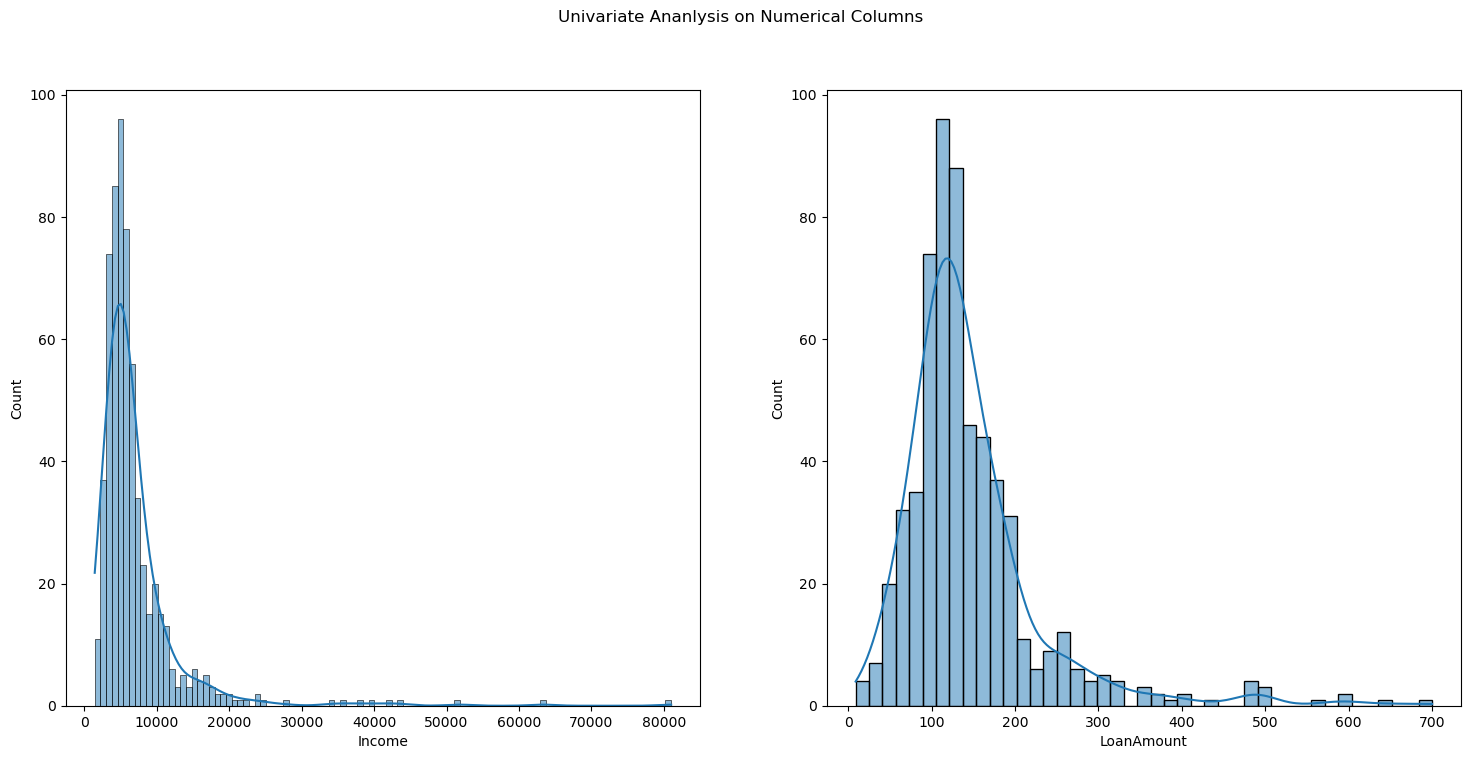

In [137]:
plt.rcParams['figure.figsize']=(18,8)

plt.subplot(1,2,1)
sns.histplot(data['Income'],kde=True)

plt.subplot(1,2,2)
sns.histplot(data['LoanAmount'],kde=True)

plt.suptitle('Univariate Ananlysis on Numerical Columns')
plt.show()

In [138]:
data[continous].skew()

Income        5.633449
LoanAmount    2.677552
dtype: float64

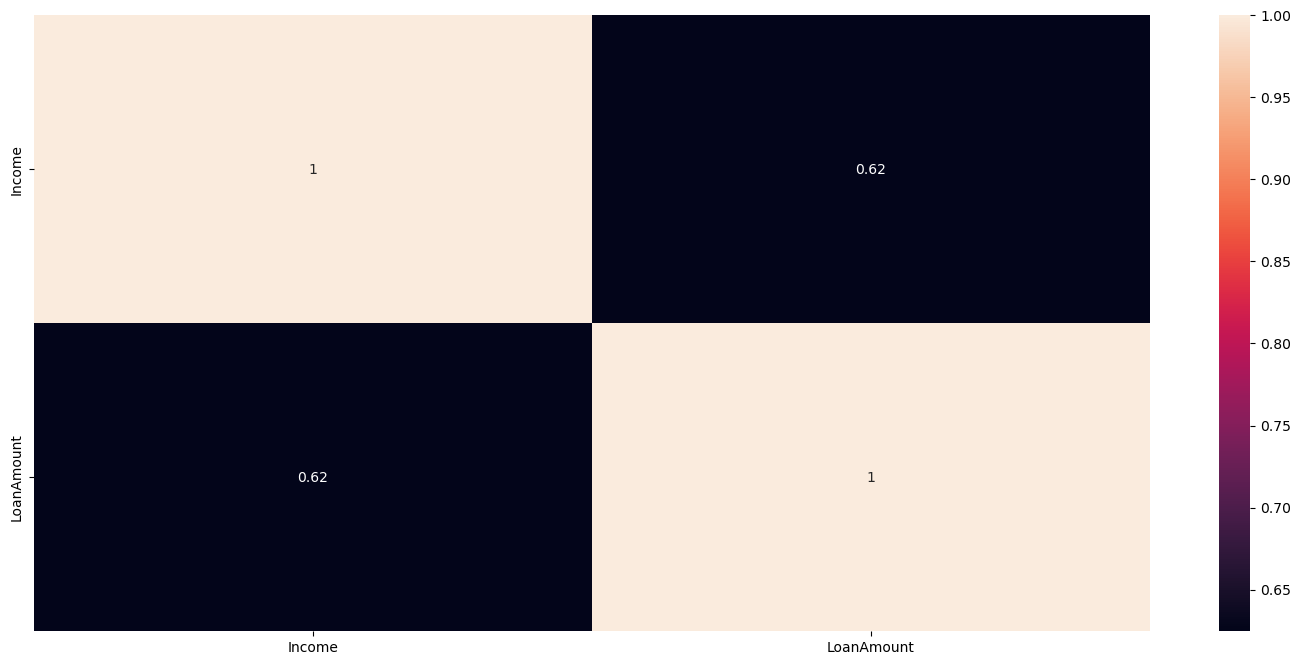

In [141]:
sns.heatmap(data[continous].corr(),annot=True)
plt.show()

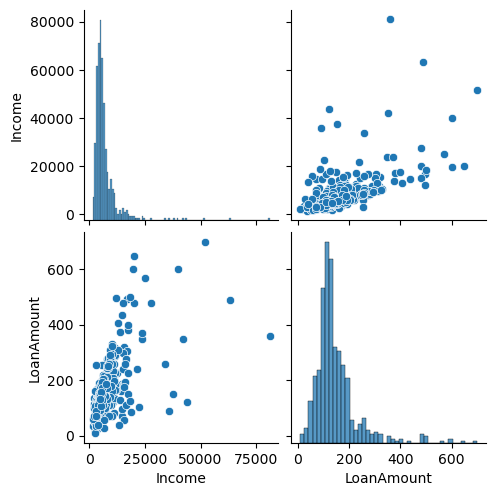

In [142]:
sns.pairplot(data[continous])
plt.show()

*For Discrete Variables*

In [145]:
data[discrete_categorical].describe()

,Gender,Married,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
count,601,611,614,582,564,614,614
unique,2,2,2,2,2,3,2
top,Male,Yes,Graduate,No,good,Semiurban,Y
freq,489,398,480,500,475,233,422


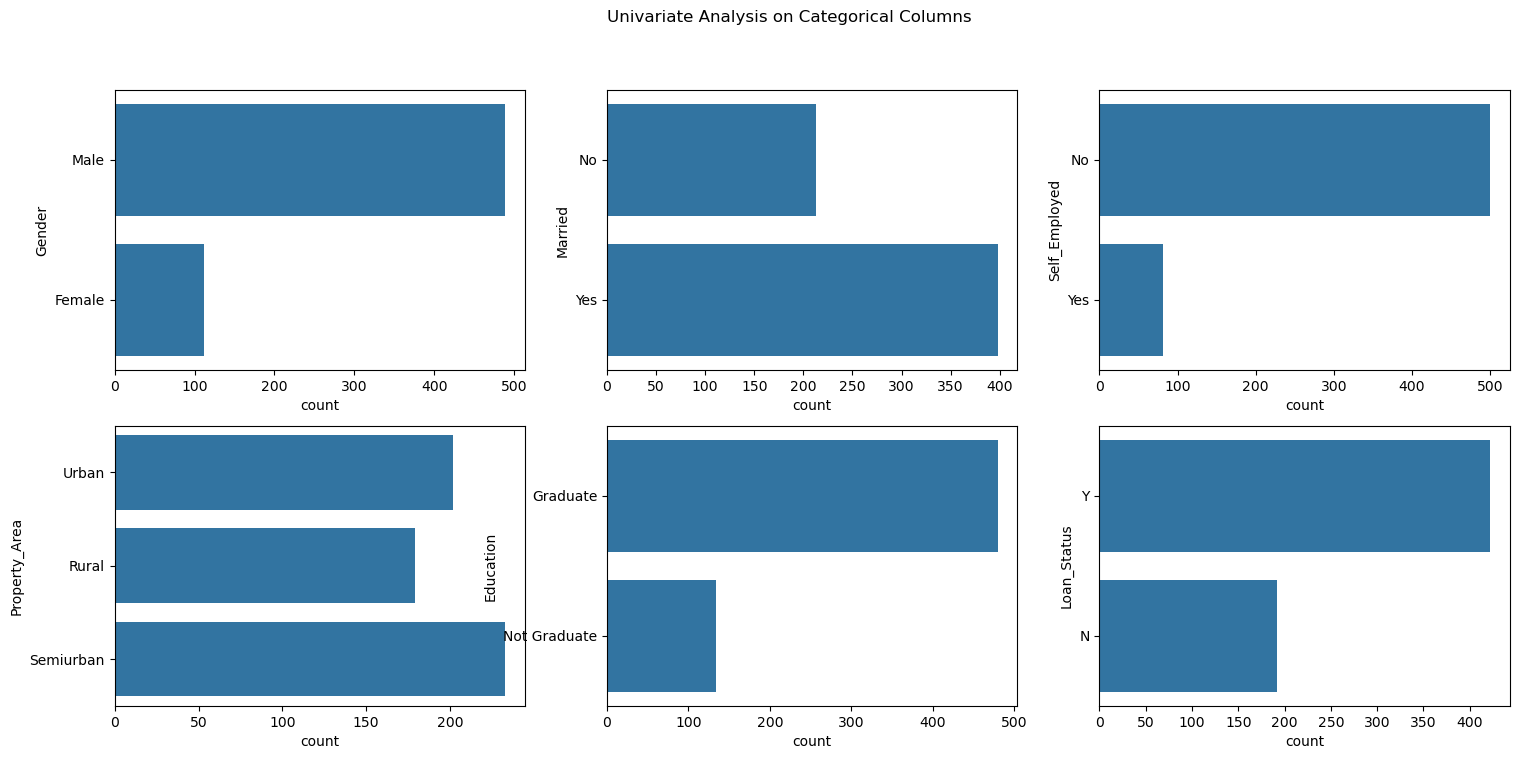

In [146]:
plt.rcParams['figure.figsize']=(18,8)

plt.subplot(2,3,1)
sns.countplot(data['Gender'])

plt.subplot(2,3,2)
sns.countplot(data['Married'])

plt.subplot(2,3,3)
sns.countplot(data['Self_Employed'])

plt.subplot(2,3,4)
sns.countplot(data['Property_Area'])

plt.subplot(2,3,5)
sns.countplot(data['Education'])

plt.subplot(2,3,6)
sns.countplot(data['Loan_Status'])

plt.suptitle('Univariate Analysis on Categorical Columns')
plt.show()

In [147]:
data.describe(include='object').columns[:6]

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Credit_History'],
      dtype='object')

In [149]:
for col in data.describe(include='object').columns[:6]:
    print(f'Impact of {col} on Loan Status')
    print(pd.crosstab(data['Loan_Status'],data[col]))
    print('\n')

Impact of Gender on Loan Status
Gender       Female  Male
Loan_Status              
N                37   150
Y                75   339


Impact of Married on Loan Status
Married       No  Yes
Loan_Status          
N             79  113
Y            134  285


Impact of Dependents on Loan Status
Dependents     0   1   2  3+
Loan_Status                 
N            107  36  25  18
Y            238  66  76  33


Impact of Education on Loan Status
Education    Graduate  Not Graduate
Loan_Status                        
N                 140            52
Y                 340            82


Impact of Self_Employed on Loan Status
Self_Employed   No  Yes
Loan_Status            
N              157   26
Y              343   56


Impact of Credit_History on Loan Status
Credit_History  bad  good
Loan_Status              
N                82    97
Y                 7   378




**Check for missing values**

In [152]:
data.isnull().sum()

Gender              13
Married              3
Dependents          15
Education            0
Self_Employed       32
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
Property_Area        0
Loan_Status          0
Income               0
dtype: int64

**Check for skewness**

In [158]:
data[continous].skew()

Income        5.633449
LoanAmount    2.677552
dtype: float64

**Check Outliers**

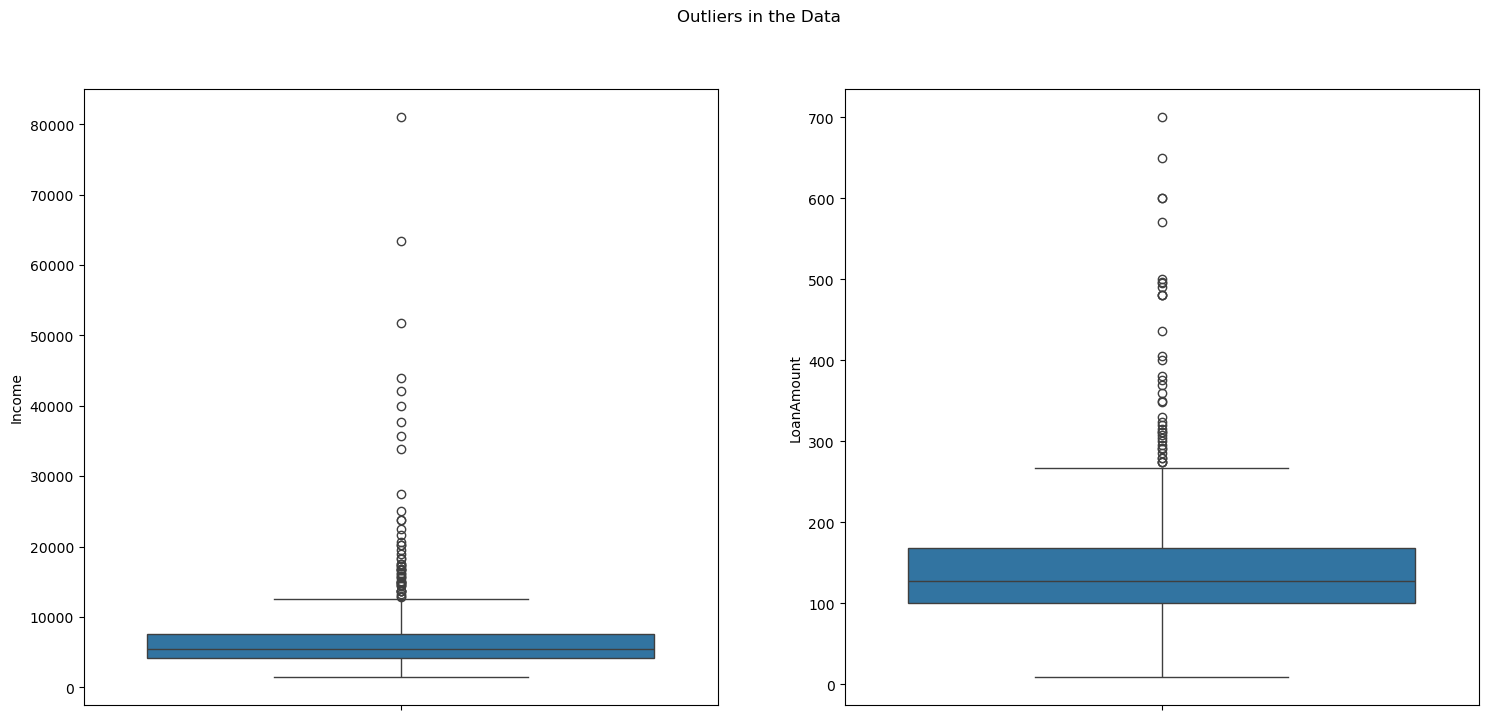

In [161]:
# Lets visualize the outliers using boxplot

plt.subplot(1,2,1)
sns.boxplot(data['Income'])

plt.subplot(1,2,2)
sns.boxplot(data['LoanAmount'])

plt.suptitle('Outliers in the Data')
plt.show()

## *Step-3: Data Preparation*
1. Data Cleaning
   - Wrong Data
   - Missing Values
   - Wrong Data type
   - Duplicates
   - Outliers
2. Data Wrangling
   - Transformation (applicable on continous)
   - Scaling(Applicable on continous)
   - Encoding (Applicable on discrete categorical)

**Don't apply Data wrangling on Count Variable**

**Wrong Data Treatment**

In [165]:
data['Dependents']=data['Dependents'].replace({'3+':3})

**Missing Values Treatment**

In [168]:
data['Dependents'] = data['Dependents'].fillna(0)

data['Gender']=data['Gender'].fillna(data['Gender'].mode()[0])
data['Married']=data['Married'].fillna(data['Married'].mode()[0])
data['Self_Employed']=data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])

data=data.dropna(subset=['Income','LoanAmount','Loan_Amount_Term','Credit_History'])

**Data type conversion**

In [171]:
data['Dependents']=data['Dependents'].astype('int')
data['Loan_Amount_Term']=data['Loan_Amount_Term'].astype('int')

In [173]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income
1,Male,Yes,1,Graduate,No,128.0,360,good,Rural,N,6091.0
2,Male,Yes,0,Graduate,Yes,66.0,360,good,Urban,Y,3000.0
3,Male,Yes,0,Not Graduate,No,120.0,360,good,Urban,Y,4941.0
4,Male,No,0,Graduate,No,141.0,360,good,Urban,Y,6000.0
5,Male,Yes,2,Graduate,Yes,267.0,360,good,Urban,Y,9613.0


**Outliers Treatment**

In [176]:
# outliers should be retained (Because really some people will have high income

**Encoding**

In [179]:
data['Gender']=data['Gender'].replace({'Male':1,'Female':0})
data['Married']=data['Married'].replace({'Yes':1,'No':0})
data['Education']=data['Education'].replace({'Graduate':1,'Not Graduate':0})
data['Self_Employed']=data['Self_Employed'].replace({'Yes':1,'No':0})
data['Property_Area']=data['Property_Area'].replace({'Rural':0,'Semiurban':1,'Urban':2})
data['Credit_History']=data['Credit_History'].replace({'good':1,'bad':0})
data['Loan_Status']=data['Loan_Status'].replace({'Y':1,'N':0})

**Transformations**

In [182]:
from scipy.stats import boxcox
data['Income'],a=boxcox(data['Income'])
data['LoanAmount'],c=boxcox(data['LoanAmount'])

In [184]:
data['Loan_Amount_Term']=data['Loan_Amount_Term']/12

**X & y**

In [223]:
X=data.drop('Loan_Status',axis=1)
y=data['Loan_Status']
X.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Income
1,1,1,1,1,0,6.243267,30.0,1,0,1.864967
2,1,1,0,1,1,5.202610,30.0,1,2,1.856556
3,1,1,0,0,0,6.138816,30.0,1,2,1.862802
4,1,0,0,1,0,6.401083,30.0,1,2,1.864819
5,1,1,2,1,1,7.481931,30.0,1,2,1.868932


**Apply PCA**

In [227]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[ 0.4678611 ,  0.74250902,  0.23185309, ...,  0.4189935 ,
        -1.31043129,  0.22888909],
       [ 0.4678611 ,  0.74250902, -0.7493492 , ...,  0.4189935 ,
         1.26180675, -1.43529794],
       [ 0.4678611 ,  0.74250902, -0.7493492 , ...,  0.4189935 ,
         1.26180675, -0.1995022 ],
       ...,
       [ 0.4678611 ,  0.74250902,  0.23185309, ...,  0.4189935 ,
         1.26180675,  0.78363102],
       [ 0.4678611 ,  0.74250902,  1.21305539, ...,  0.4189935 ,
         1.26180675,  0.62925567],
       [-2.1373865 , -1.34678498, -0.7493492 , ..., -2.38667185,
        -0.02431227, -0.36549422]])

**Train-Test-split**

In [229]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=78)

In [233]:
X_train

array([[ 0.4678611 , -1.34678498, -0.7493492 , ...,  0.4189935 ,
        -1.31043129, -0.28567942],
       [-2.1373865 ,  0.74250902,  1.21305539, ...,  0.4189935 ,
         1.26180675,  1.60454976],
       [ 0.4678611 ,  0.74250902,  0.23185309, ...,  0.4189935 ,
         1.26180675, -0.69041582],
       ...,
       [ 0.4678611 , -1.34678498, -0.7493492 , ...,  0.4189935 ,
         1.26180675, -0.71800426],
       [-2.1373865 ,  0.74250902, -0.7493492 , ...,  0.4189935 ,
        -0.02431227, -0.96539681],
       [-2.1373865 , -1.34678498, -0.7493492 , ..., -2.38667185,
        -0.02431227, -0.17390589]])

In [195]:
from sklearn.decomposition import PCA
pca_model = PCA(n_components=0.95)

X_train_pca = pca_model.fit_transform(X_train)
X_test_pca = pca_model.fit_transform(X_test)

## *Step-4: Modeling & Evaluation*

**1. Logistic Regression**

In [199]:
# Modeling
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(X_train_pca,y_train)

# Predict & Evaluation on train data
ypred_train=log_model.predict(X_train_pca) # default threshold value is 0.5
from sklearn.metrics import accuracy_score
print('Train Accuracy:',accuracy_score(y_train,ypred_train))

# Cross validation on train data
from sklearn.model_selection import cross_val_score
print('CV Score:',cross_val_score(log_model,X_train_pca,y_train,cv=5,scoring='accuracy').mean())

# Predict & Evaluation on test data
ypred_test=log_model.predict(X_test_pca)
print('Test Accuracy:',accuracy_score(y_test,ypred_test))

Train Accuracy: 0.8132387706855791
CV Score: 0.8131932773109243
Test Accuracy: 0.6037735849056604


In [201]:
from sklearn.metrics import confusion_matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test,ypred_test))
      
from sklearn.metrics import classification_report
print('Classification Report:')
print(classification_report(y_test,ypred_test))

Confusion Matrix:
[[ 7 23]
 [19 57]]
Classification Report:
              precision    recall  f1-score   support

           0       0.27      0.23      0.25        30
           1       0.71      0.75      0.73        76

    accuracy                           0.60       106
   macro avg       0.49      0.49      0.49       106
weighted avg       0.59      0.60      0.59       106



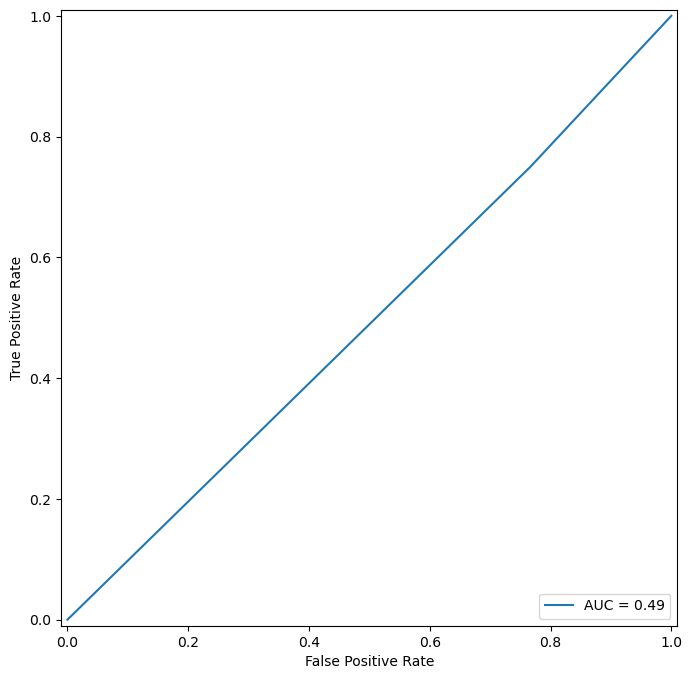

In [203]:
from sklearn.metrics import roc_curve,auc,RocCurveDisplay

fpr,tpr,thresholds=roc_curve(y_test,ypred_test)
roc_auc=auc(fpr,tpr)
RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc).plot()
plt.show()

In [205]:
# AUC Score
from sklearn.metrics import roc_auc_score
print('AUC Score:',roc_auc_score(y_test,ypred_test))

AUC Score: 0.49166666666666664


**2. KNN**

- HPT
- Modeling & Evaluation

In [207]:
# Hyperparameter tuning
from sklearn.neighbors import KNeighborsClassifier
estimator=KNeighborsClassifier()
param_grid={'n_neighbors':list(range(1,50)),'p':[1,2]}
from sklearn.model_selection import GridSearchCV
knn_grid=GridSearchCV(estimator,param_grid,scoring='accuracy',cv=5)
knn_grid.fit(X_train_pca,y_train)

# KNN With best hyperparameters
knn_grid.best_estimator_

KNeighborsClassifier(n_neighbors=7)

In [209]:
# Modeling
knn_model=knn_grid.best_estimator_
knn_model.fit(X_train_pca,y_train)

# Predict & Evaluate on train data
ypred_train=knn_model.predict(X_train_pca)
print('Train accuracy:',accuracy_score(y_train,ypred_train))

# Cross validation on train data
print('CV Score:',cross_val_score(knn_model,X_train_pca,y_train,cv=5,scoring='accuracy').mean())

# Predict & Evaluation on test data
ypred_test=knn_model.predict(X_test_pca)
print('Test Accuracy:',accuracy_score(y_test,ypred_test))

Train accuracy: 0.8108747044917257
CV Score: 0.815546218487395
Test Accuracy: 0.6792452830188679


**3. Support Vector Machine (SVM)**

- HPT
- Modeling & Evaluation

In [211]:
# Hyperparameter tuning
from sklearn.svm import SVC
estimator=SVC()
param_grid={'C':[0.01,0.1,1],'kernel':['linear','rbf','sigmoid','poly']}
from sklearn.model_selection import GridSearchCV
svm_grid=GridSearchCV(estimator,param_grid,scoring='accuracy',cv=5)
svm_grid.fit(X_train_pca,y_train)

# SVM with best hyperparameters
svm_grid.best_estimator_

SVC(C=0.01, kernel='linear')

In [213]:
# Modeling
svm_model=svm_grid.best_estimator_
svm_model.fit(X_train_pca,y_train)

# Predict & Evaluate on train data
ypred_train=svm_model.predict(X_train_pca)
print('Train accuracy:',accuracy_score(y_train,ypred_train))

# Cross validation on train data
print('CV Score:',cross_val_score(svm_model,X_train_pca,y_train,cv=5,scoring='accuracy').mean())

# Predict & Evaluation on test data
ypred_test=svm_model.predict(X_test_pca)
print('Test Accuracy:',accuracy_score(y_test,ypred_test))

Train accuracy: 0.8132387706855791
CV Score: 0.8131932773109243
Test Accuracy: 0.6226415094339622


**4. Decision Tree Classifier**

- HPT
- Identify important features by using feature selection (ensemble method)
- Modeling & Evaluation

**First create default DT model(fully grown tree without any pruning) so that, we can understand the max_depth.**

In [215]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=True)
model.fit(X_train_pca,y_train)

DecisionTreeClassifier(random_state=True)

In [221]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,20),dpi=300)
plot_tree(model,filled=True,
          feature_names=X_train.columns.tolist(),
          class_names=['0','1'])
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

<Figure size 6000x6000 with 0 Axes>

In [235]:
# Hyper parameter tuning
estimator = DecisionTreeClassifier(random_state=True)

param_grid = {'criterion':['gini','entropy'],
              'max_depth':list(range(1,19))}

dt_grid = GridSearchCV(estimator,param_grid,scoring='accuracy',cv=5)
dt_grid.fit(X_train_pca,y_train)

dt = dt_grid.best_estimator_
dt

DecisionTreeClassifier(max_depth=1, random_state=True)

In [237]:
# Important features
feats_ab = pd.DataFrame(data=dt.feature_importances_,
                        index=X.columns,
                        columns=['Importance'])

important_features_dt = feats_ab[feats_ab['Importance']>0].index.tolist()
important_features_dt

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

**Creating Decision Tree Model with important parameters and important features**

In [163]:
# Selecting train & Test data
X_train_dt = X_train[important_features_dt]
X_test_dt = X_test[important_features_dt]

# Modeling
dt = dt_grid.best_estimator_
dt.fit(X_train_dt,y_train)

# Evaluation
ypred_train = dt.predict(X_train_dt)
ypred_test = dt.predict(X_test_dt)

print('Train Accuracy:',accuracy_score(y_train,ypred_train))
print('CV Score:',cross_val_score(dt,X_train_dt,y_train,cv=5,scoring='accuracy').mean())
print('Test Accuracy:',accuracy_score(y_test,ypred_test))

Train Accuracy: 0.8132387706855791
CV Score: 0.8131932773109243
Test Accuracy: 0.8207547169811321


**5. Random Forest Classifier**

- HPT
- Identify important features
- Modeling
- Evaluation

In [128]:
# Hyper parameter tuning
from sklearn.ensemble import RandomForestClassifier
estimator = RandomForestClassifier(random_state=True)

param_grid = {'n_estimators':list(range(1,51))}

rf_grid = GridSearchCV(estimator,param_grid,scoring='accuracy',cv=5)
rf_grid.fit(X_train,y_train)

rf = rf_grid.best_estimator_
rf

RandomForestClassifier(n_estimators=19, random_state=True)

In [130]:
# Important features
feats_ab = pd.DataFrame(data=rf.feature_importances_,
                        index=X.columns,
                        columns=['Importance'])

important_features_rf = feats_ab[feats_ab['Importance']>0].index.tolist()
important_features_rf

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Income']

In [132]:
# Selecting train & Test data
X_train_rf = X_train[important_features_rf]
X_test_rf = X_test[important_features_rf]

# Modeling
rf = rf_grid.best_estimator_
rf.fit(X_train_rf,y_train)

# Evaluation
ypred_train = rf.predict(X_train_rf)
ypred_test = rf.predict(X_test_rf)

print('Train Accuracy:',accuracy_score(y_train,ypred_train))
print('CV Score:',cross_val_score(rf,X_train_rf,y_train,cv=5,scoring='accuracy').mean())
print('Test Accuracy:',accuracy_score(y_test,ypred_test))

Train Accuracy: 0.9881796690307328
CV Score: 0.8061344537815126
Test Accuracy: 0.8207547169811321


**6. AdaBoost Classifier**

In [135]:
# Hyper parameter tuning
from sklearn.ensemble import AdaBoostClassifier
estimator = AdaBoostClassifier(random_state=True)

param_grid = {'n_estimators':list(range(1,51))}

ab_grid = GridSearchCV(estimator,param_grid,scoring='accuracy',cv=5)
ab_grid.fit(X_train,y_train)

ab = ab_grid.best_estimator_
ab

AdaBoostClassifier(n_estimators=5, random_state=True)

In [137]:
# Important features
feats_ab = pd.DataFrame(data=ab.feature_importances_,
                        index=X.columns,
                        columns=['Importance'])

important_features_ab = feats_ab[feats_ab['Importance']>0].index.tolist()
important_features_ab

['Dependents', 'LoanAmount', 'Credit_History', 'Property_Area', 'Income']

In [139]:
# Selecting train & Test data
X_train_ab = X_train[important_features_ab]
X_test_ab = X_test[important_features_ab]

# Modeling
ab = ab_grid.best_estimator_
ab.fit(X_train_ab,y_train)

# Evaluation
ypred_train = ab.predict(X_train_ab)
ypred_test = ab.predict(X_test_ab)

print('Train Accuracy:',accuracy_score(y_train,ypred_train))
print('CV Score:',cross_val_score(ab,X_train_ab,y_train,cv=5,scoring='accuracy').mean())
print('Test Accuracy:',accuracy_score(y_test,ypred_test))

Train Accuracy: 0.8156028368794326
CV Score: 0.8155742296918767
Test Accuracy: 0.8207547169811321


**7. Gradient Boost Classifier**

In [142]:
# Hyper parameter tuning
from sklearn.ensemble import GradientBoostingClassifier
estimator = GradientBoostingClassifier(random_state=True)

param_grid = {'n_estimators':list(range(1,51)),
             'learning_rate':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
             }

gb_grid = GridSearchCV(estimator,param_grid,scoring='accuracy',cv=5)
gb_grid.fit(X_train,y_train)

gb = gb_grid.best_estimator_
gb

GradientBoostingClassifier(n_estimators=5, random_state=True)

In [144]:
# Important features
feats_ab = pd.DataFrame(data=gb.feature_importances_,
                        index=X.columns,
                        columns=['Importance'])

important_features_gb = feats_ab[feats_ab['Importance']>0].index.tolist()
important_features_gb

['Dependents',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Income']

In [146]:
# Selecting train & Test data
X_train_gb = X_train[important_features_gb]
X_test_gb = X_test[important_features_gb]

# Modeling
gb = gb_grid.best_estimator_
gb.fit(X_train_gb,y_train)

# Evaluation
ypred_train = gb.predict(X_train_gb)
ypred_test = gb.predict(X_test_gb)

print('Train Accuracy:',accuracy_score(y_train,ypred_train))
print('CV Score:',cross_val_score(gb,X_train_gb,y_train,cv=5,scoring='accuracy').mean())
print('Test Accuracy:',accuracy_score(y_test,ypred_test))

Train Accuracy: 0.817966903073286
CV Score: 0.8131932773109243
Test Accuracy: 0.8207547169811321


**8. XGBoost Classifier**

In [149]:
# Hyper parameter tuning
from xgboost import XGBClassifier
estimator = XGBClassifier()

param_grid = {'n_estimators':[10,20,40,100],
              'max_depth':[3,4,5],
              'gamma':[0,0.15,0.3,0.5,1]
             }

xgb_grid = GridSearchCV(estimator,param_grid,scoring='accuracy',cv=5)
xgb_grid.fit(X_train,y_train)

xgb = xgb_grid.best_estimator_
xgb

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.3, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [151]:
# Important features
feats_xgb = pd.DataFrame(data=xgb.feature_importances_,
                        index=X.columns,
                        columns=['Importance'])

important_features_xgb = feats_xgb[feats_xgb['Importance']>0].index.tolist()
important_features_xgb

['Gender',
 'Married',
 'Dependents',
 'Education',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Income']

In [153]:
# Selecting train & Test data
X_train_xgb = X_train[important_features_xgb]
X_test_xgb = X_test[important_features_xgb]

# Modeling
xgb = xgb_grid.best_estimator_
xgb.fit(X_train_xgb,y_train)

# Evaluation
ypred_train = xgb.predict(X_train_xgb)
ypred_test = xgb.predict(X_test_xgb)

print('Train Accuracy:',accuracy_score(y_train,ypred_train))
print('CV Score:',cross_val_score(xgb,X_train_xgb,y_train,cv=5,scoring='accuracy').mean())
print('Test Accuracy:',accuracy_score(y_test,ypred_test))

Train Accuracy: 0.8392434988179669
CV Score: 0.8131932773109243
Test Accuracy: 0.8490566037735849
